Lab | Customer Analysis Round 7
For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution
- Get the data
- We are using the marketing_customer_analysis.csv file.

1. Dealing with the data
Already done in rounds 2 to 7.

Bonus: Build a function, from round 2 and round 7, to clean and process the data.

2. Explore the data
Done in the round 3.

3. Modeling
Description:

Try to improve the linear regression model.

Hago este laboratorio apartir del laboratorio 6, y por ello pongo las dos en el repositorio.

In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\marco\OneDrive\Desktop\ironhack\Laboratorios\files\marketing_customer_analysis (1).csv')
df=df.dropna()
numericos=df.select_dtypes(include=["int64", "float64"])
categoricos=df.select_dtypes(exclude=["int64", "float64"])
correlaciones=numericos.corr()
correlaciones
x = df.drop(columns="Customer Lifetime Value") # Cojo todo menos customer lifetime value
y = df["Customer Lifetime Value"] # Cojo solo customer lifetime value
from sklearn.preprocessing import MinMaxScaler #Has de importar esta libreria para normalizar
scaler=MinMaxScaler()
nomalized_df=scaler.fit_transform(df.select_dtypes(include=["int64", "float64"]))
response_code = pd.get_dummies(categoricos['Coverage'])  # los categoricos ya los definiste antes
# Concatenar las nuevas columnas codificadas con el DataFrame original
categoricos= pd.concat([categoricos, response_code], axis=1)
# Eliminar la columna original de la categoría, ya que ya está codificada
categoricos.drop('Coverage', axis=1, inplace=True)
# Mostrar el DataFrame resultante
print(categoricos)
from sklearn.preprocessing import LabelEncoder

#Este objeto se utiliza para transformar etiquetas categóricas en números 
# --> útil en preprocesamiento de datos para algoritmos de aprendizaje automático.
label_encoder = LabelEncoder()

# Aplicamos el Label Encoding a las etiquetas
    #El objeto LabelEncoder codifica una columna específica llamada "Marital Status" de un DataFrame categoricos1:
categoricos["Marital Status"] = label_encoder.fit_transform(categoricos["Marital Status"])
# Creamos una instancia del LabelEncoder y lo ajustamos a las etiquetas originales
codificaciones = label_encoder.fit_transform(df["Marital Status"])
# Obtenemos las categorías originales
categorias_originales = label_encoder.classes_
categorias_originales

      Customer       State Response             Education Effective To Date  \
2      LZ68649  Washington       No              Bachelor           2/10/11   
3      XL78013      Oregon      Yes               College           1/11/11   
10     HG93801     Arizona       No  High School or Below            1/2/11   
13     KR82385  California       No                Master           1/26/11   
16     FH51383  California       No  High School or Below            2/7/11   
...        ...         ...      ...                   ...               ...   
10902  PP30874  California       No  High School or Below           1/24/11   
10903  SU71163     Arizona       No               College            1/7/11   
10904  QI63521      Nevada       No  High School or Below           2/24/11   
10906  KX53892      Oregon       No               College            1/6/11   
10908  WA60547  California       No               College           2/13/11   

      EmploymentStatus Gender Location Code Marital

array(['Divorced', 'Married', 'Single'], dtype=object)

In [2]:
df = df.drop(columns=['Unnamed: 0'])

In [3]:
x=x[["Income", "Monthly Premium Auto", "Months Since Last Claim", "Months Since Policy Inception", "Number of Open Complaints", "Number of Policies", "Total Claim Amount"]]

In [4]:
# Ahora intentamos analizar colinearity con VIF:
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Añadir una columna constante al DataFrame para el término de intercepción
# x = add_constant(numericos)
# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(7)]

# Imprimir el DataFrame con los resultados del VIF
print(vif_data)

                        Variable        VIF
0                         Income   2.849849
1           Monthly Premium Auto  12.306948
2        Months Since Last Claim   2.753084
3  Months Since Policy Inception   3.261772
4      Number of Open Complaints   1.169407
5             Number of Policies   2.291154
6             Total Claim Amount   6.609525


In [5]:
numericos

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
10,10,5154.764074,82730,127,13.0,31,0.0,1,442.521087
13,13,5454.587929,66334,69,25.0,25,0.0,4,331.200000
16,16,5326.677654,76717,66,26.0,10,0.0,6,300.528579
...,...,...,...,...,...,...,...,...,...
10902,10902,3579.023825,28304,91,10.0,30,2.0,1,655.200000
10903,10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000
10904,10904,19228.463620,0,187,14.0,32,0.0,2,897.600000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929


In [8]:
# Segun los resuktados, VIF>5 --> multicolinearity y debes eliminar
x1=x[["Income", "Months Since Last Claim", "Months Since Policy Inception", "Number of Open Complaints", "Number of Policies", "Total Claim Amount"]]

In [12]:
from sklearn.model_selection import train_test_split
# Problema: dentro de x hay vbles categoricas asi que vamos a definir x1 DF sin categoricos:
x1=x.select_dtypes(exclude=["object"])
# Dividir los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)
# x (vble indep), y (vble dep)
#test_size (tamaño del conjunto d eprueba, ahora 20%)
#random_state(semilla para garantizar que la división sea reproducible. Puedes cambiar este valor o dejarlo en None.)
# Para entrenar el modelo:
from sklearn.linear_model import LinearRegression
# Paso 2: Instancia el modelo
modelo = LinearRegression()

# Paso 3: Entrena el modelo
modelo.fit(x1_train, y_train)

# Ahora el modelo ha sido entrenado en los datos de entrenamiento

coef_regresion=modelo.coef_[0] #corte en abcisas
pendiente=modelo.intercept_
y_pred = modelo.predict(x1)

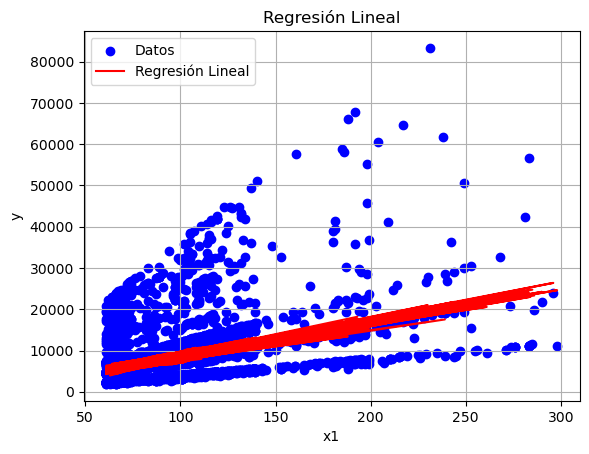

In [14]:
import matplotlib.pyplot as plt
# Scatter plot de los datos
plt.scatter(x1["Monthly Premium Auto"], y, color='blue', label='Datos')  

# Trazar la línea de regresión
plt.plot(x1["Monthly Premium Auto"], y_pred, color='red', label='Regresión Lineal')  

plt.xlabel('x1')  # Etiqueta del eje x
plt.ylabel('y')  # Etiqueta del eje y
plt.title('Regresión Lineal')  # Título del gráfico
plt.grid(True)  # Mostrar cuadrícula
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar gráfico

In [15]:
# 11. Model Validation. Description:
    # 11.1. R2:
from sklearn.metrics import r2_score

# Supongamos que tienes tus datos de predicción y de verdad
# y_pred = ...
# y_true = ...

# Calcular el R cuadrado
r_cuadrado = r2_score(y, y_pred)

print("R cuadrado del modelo:", r_cuadrado)
# El R cuadrado varía entre 0-1 (nula-total explicacion de la varibilidad). 
# R cuadrado no es una medida perfecta de la bondad del ajuste de un modelo. 
#Puede ser engañoso. Por lo tanto, es recomendable complementar el analisis con otras métricas de evaluación como:
#error cuadrático medio (MSE), error absoluto medio (MAE)para obtener una imagen más completa del rendimiento del modelo.

R cuadrado del modelo: 0.17546115361306502


In [17]:
# 11.2. MSE --> error cuadrático medio
from sklearn.metrics import mean_squared_error
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y, y_pred)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 39927789.518765


In [18]:
import numpy as np
# 11.3. RMSE --> MRoot Mean Squared Error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 6318.844001774771


In [19]:
from sklearn.metrics import mean_absolute_error
# 11.4. MAE --> Mean Absolut error
mae = mean_absolute_error(y, y_pred)
print("MAE:", mae)

MAE: 3896.5516000865737
